In this notebook we use Python to draw [colorpleth maps](https://en.wikipedia.org/wiki/Choropleth_map) that report risk to assets, capacity, and resulting risk to welfare on a simpliied map of the Philippines.
The map used is a [shapefile](https://en.wikipedia.org/wiki/Shapefile) from [GADM.org](http://gadm.org) that was simplified with  [mapshaper.org](http://mapshaper.org) the converted to SVG with Kartograph

This first lines sets technical options for the python notebook. 

In [31]:
#clears memory for a fresh start
%reset-f

#ask python to reload the function definitons each time before executing the functions
%load_ext autoreload  
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get the Data

In [32]:
import pandas as pd

In [33]:
df_with_results = pd.read_csv("all_data_and_results.csv", index_col=0)
df_with_results.head()

,gdp_pc_pp,pop,pov_head,shew,gdp_pc_pp_nat,rel_gdp_pp,share1,axfin_p,axfin_r,social_p,...,deltaW_nat,equivalent_cost,risk,total_equivalent_cost,total_equivalent_cost_of_nat_buyout,resilience,resilience_no_shock,resilience_no_shock_no_uspcale,resilience_no_shock_no_SP,risk_to_assets
variable,,,,,,,,,,,,,,,,,,,,,
Abra,133.688,240135.244121,0.373595,0.953416,184.136685,0.726026,0.374005,0.693233,0.693233,0.408683,...,0.000577,1.404127,0.010503,337180.340460,293.408085,0.564488,0.564979,0.540228,0.493691,0.005929
Agusan Del Norte,179.014,661728.454375,0.346715,0.821277,184.136685,0.972180,0.279308,0.496880,0.496880,0.388003,...,0.006175,4.855891,0.027126,3213281.007688,9733.568870,0.711555,0.713710,0.621714,0.496033,0.019301
Agusan Del Sur,126.492,677779.682154,0.480785,0.821277,184.136685,0.686946,0.395282,0.475969,0.475969,0.388003,...,0.001401,1.808137,0.014294,1225518.384145,2469.515025,0.462602,0.463534,0.393891,0.304331,0.006613
Apayao,158.732,116022.676390,0.613667,0.953416,184.136685,0.862034,0.314996,0.261280,0.261280,0.408683,...,0.000006,0.055648,0.000351,6456.468380,2.401617,0.499669,0.499855,0.467491,0.410723,0.000175
Batangas,219.272,2485002.055465,0.190351,1.117207,184.136685,1.190811,0.228027,0.601054,0.601054,0.362780,...,0.000155,0.024451,0.000112,60760.145501,1135.894217,1.151401,1.172926,1.100413,0.991246,0.000128


## Map the data

The following library, coded for this project, allows to plot maps. To work proprerly, it requires that the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. (Inkspace is used to transform [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps into PDF and [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics)

In [34]:
#this library contains ad hoc functions, coded for this project, that allow to produce maps 
from maps_lib import * 

In [35]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: 
#this controls the font used in the legend
font = {'family' : 'sans serif',
    'size'   : 22}
plt.rc('font', **font)

In [36]:
# path to the blank map 
svg_file_path = "map/PHL_adm1.svg"

#### First block: risk to assets 

Missing in series: Aklan; Albay; Antique; Aurora; Basilan; Bataan; Batanes; Benguet; Biliran; Bohol; Camarines Norte; Camiguin; Catanduanes; Cavite; Cebu; Compostela Valley; Davao Del Sur; Davao Oriental; Dinagat Islands; Eastern Samar; Guimaras; Iloilo; Leyte; Marinduque; Masbate; Metropolitan Manila; Misamis Occidental; Misamis Oriental; Mountain Province; Negros Oriental; Northern Samar; Occidental Mindoro; Oriental Mindoro; Palawan; Quirino; Romblon; Shariff Kabunsuan; Siquijor; Sorsogon; Southern Leyte; Sulu; Surigao Del Norte; Surigao Del Sur; Tawi-Tawi; Zambales; Zamboanga Del Norte; Zamboanga Sibugay


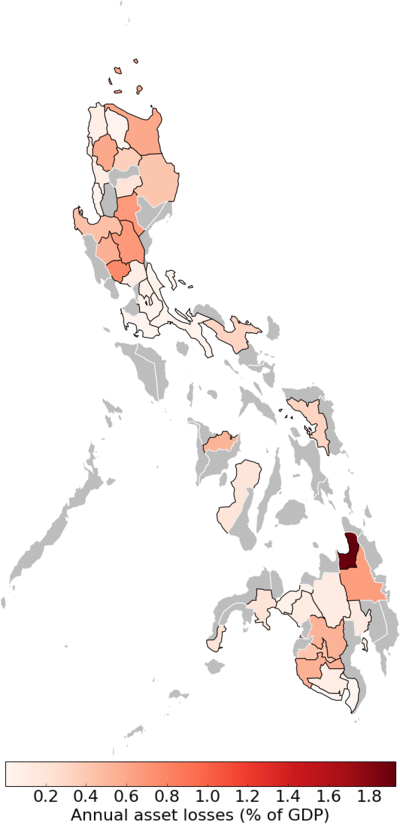

In [39]:
make_map_from_svg(
        df_with_results.risk_to_assets, 
        svg_file_path,
        outname="asset_risk", 
        color_maper=plt.cm.get_cmap("Reds"), 
        label="Annual asset losses (% of GDP)",
        new_title="Map of asset risk in the Philippines")

#### Second block: socio-economic capacity 

Missing in series: Aklan; Albay; Antique; Aurora; Basilan; Bataan; Batanes; Benguet; Biliran; Bohol; Camarines Norte; Camiguin; Catanduanes; Cavite; Cebu; Compostela Valley; Davao Del Sur; Davao Oriental; Dinagat Islands; Eastern Samar; Guimaras; Iloilo; Leyte; Marinduque; Masbate; Metropolitan Manila; Misamis Occidental; Misamis Oriental; Mountain Province; Negros Oriental; Northern Samar; Occidental Mindoro; Oriental Mindoro; Palawan; Quirino; Romblon; Shariff Kabunsuan; Siquijor; Sorsogon; Southern Leyte; Sulu; Surigao Del Norte; Surigao Del Sur; Tawi-Tawi; Zambales; Zamboanga Del Norte; Zamboanga Sibugay


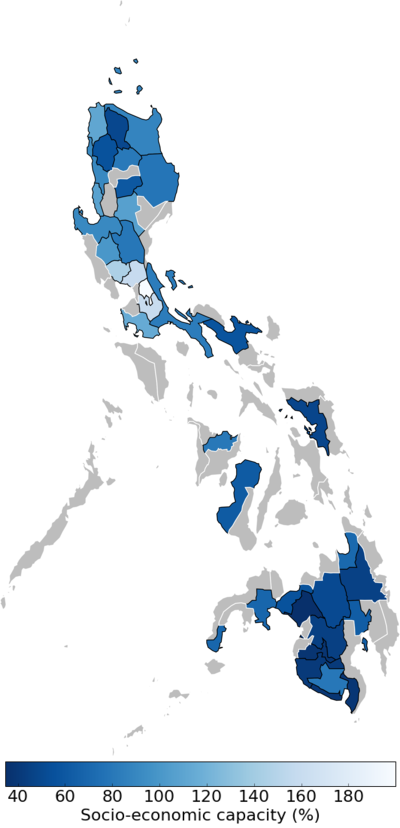

In [ ]:
make_map_from_svg(
        df_with_results.resilience, 
        svg_file_path,
        outname="se_capacity", 
        color_maper=plt.cm.get_cmap("Blues_r"), 
        label="Socio-economic capacity (%)",
        new_title="Map of socio-economic capacity in the Philippines")

#### Total risk to welfare ($\frac {\text{asset risk}} {\text{socio-economic capacity}}$)

In [ ]:
make_map_from_svg(
        df_with_results.risk, 
        svg_file_path,
        outname="welfare_risk", 
        color_maper=plt.cm.get_cmap("Purples"), 
        label="Annual welfare losses (% of GDP)",
        new_title="Map of welfare risk in the Philippines", verbose=False)